In [1]:
# Step 1: Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import pandas as pd

# Specify the path to the zip file and extract it
zip_path = '/content/drive/MyDrive/data_w5.zip'  # Replace with your actual path
extract_folder = '/content/drive/MyDrive/extracted_data/'  # Folder to extract to

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Now, find the CSV file inside the extracted folder
csv_file_path = extract_folder + 'your_data_file.csv'  # Replace with the actual file name

# Load the CSV data into pandas
data = pd.read_csv(csv_file_path)

# Check the first few rows of the data
print(data.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/extracted_data/your_data_file.csv'

In [10]:
import zipfile
import os

# Specify the path to the zip file and extract it
zip_path = '/content/drive/MyDrive/data_w5.zip'  # Replace with your actual path
data = '/content/drive/MyDrive/extracted_data/'  # Folder to extract to

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Get the list of all extracted files
data = os.listdir(data)  # List all files in the extracted folder

# Print extracted files to check if there's any .csv file
print("Extracted files:", data)


Extracted files: ['data']


In [12]:
import os

# Specify the correct folder path
folder_path = '/content/drive/MyDrive/extracted_data/data'

# List all files in the folder
extracted_files = os.listdir(folder_path)

# Print the list of files in the folder
print("Files in extracted_data/data:", extracted_files)


Files in extracted_data/data: ['Xente_Variable_Definitions.xlsx', 'Xente_Variable_Definitions.csv', 'data.csv', 'data.xlsx']


In [14]:
import pandas as pd

# Specify the correct path to the CSV file
csv_file_path = '/content/drive/MyDrive/extracted_data/data/data.csv'

# Load the CSV data into pandas
data = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(data.head())
print(data.columns)


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [15]:
# Step 4: Define Credit Risk Proxy based on 'FraudResult'
# Assuming 'FraudResult' column is available, where 1 indicates fraudulent (high risk)
# and 0 indicates not fraudulent (low risk)
data['CreditRisk'] = data['FraudResult'].apply(lambda x: 1 if x == 1 else 0)

# Step 5: Explore the distribution of Credit Risk
print(data['CreditRisk'].value_counts())

# Step 6: Check for missing values
print(data.isnull().sum())  # Check for any missing values in the dataset


CreditRisk
0    95469
1      193
Name: count, dtype: int64
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
CreditRisk              0
dtype: int64


In [16]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

# Print missing values for each column
print(missing_values)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
CreditRisk              0
dtype: int64


In [18]:
# Step 7: Analyze correlations with Credit Risk

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation of each feature with 'CreditRisk'
correlation_with_risk = correlation_matrix['CreditRisk'].sort_values(ascending=False)
print(correlation_with_risk)


FraudResult        1.000000
CreditRisk         1.000000
Value              0.566739
Amount             0.557370
PricingStrategy   -0.033821
CountryCode             NaN
Name: CreditRisk, dtype: float64


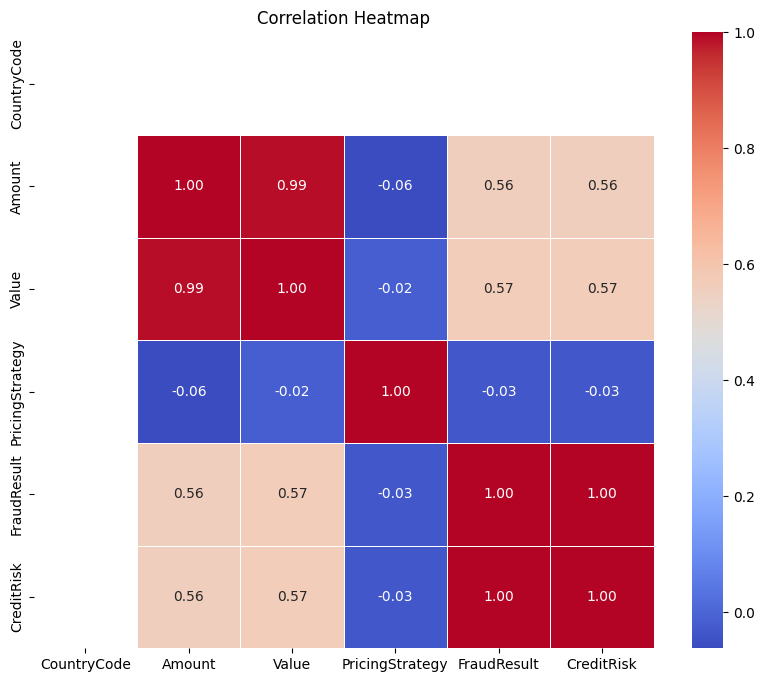

In [19]:
# Step 8: Visualize correlation matrix to get a better understanding of relationships
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


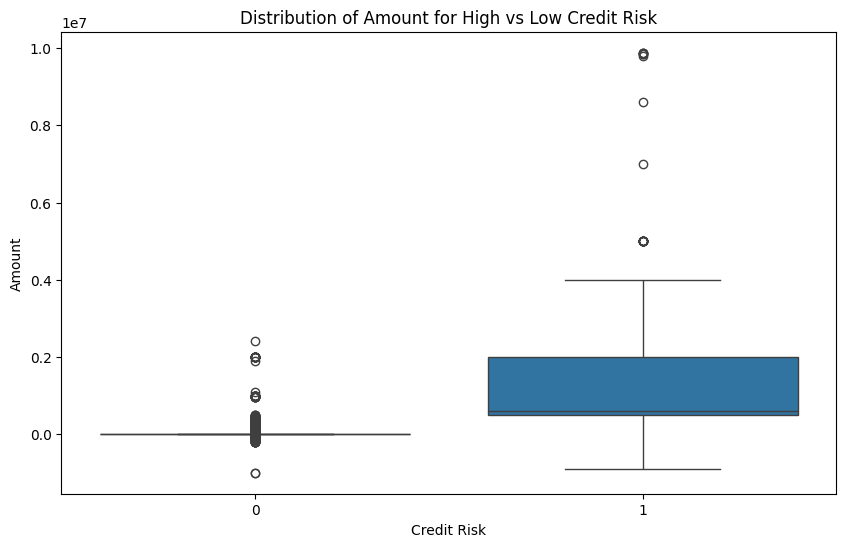

In [20]:
# Step 9: Investigate the relationship between certain features and Credit Risk
# Example: Checking distribution of 'Amount' for high and low-risk customers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='CreditRisk', y='Amount')
plt.title('Distribution of Amount for High vs Low Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Amount')
plt.show()

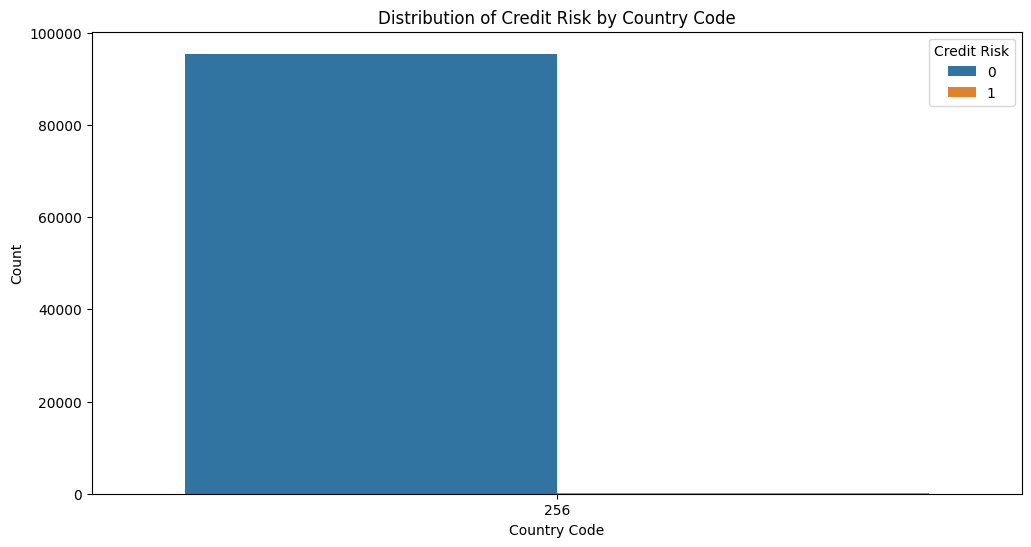

In [21]:
# Example: Checking distribution of 'CountryCode' for high and low-risk customers
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='CountryCode', hue='CreditRisk')
plt.title('Distribution of Credit Risk by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.legend(title='Credit Risk')
plt.show()

In [22]:
# Step 10: Investigate the relationship between Transaction Start Time and Credit Risk
# Assuming 'TransactionStartTime' is in datetime format, converting if necessary
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], errors='coerce')

# Create new features based on TransactionStartTime (e.g., hour of the day)
data['HourOfDay'] = data['TransactionStartTime'].dt.hour


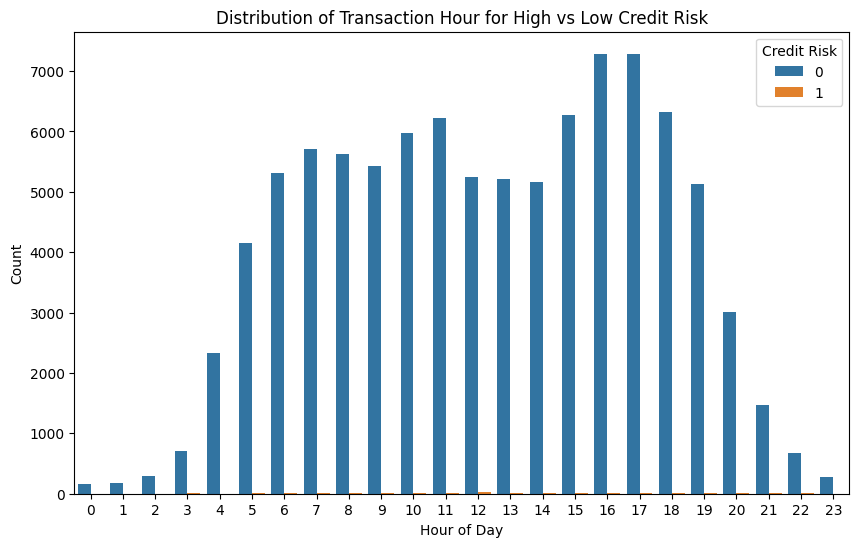

In [23]:
# Example: Checking distribution of 'HourOfDay' for high and low-risk customers
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='HourOfDay', hue='CreditRisk')
plt.title('Distribution of Transaction Hour for High vs Low Credit Risk')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Credit Risk')
plt.show()
